# Load The Dataset

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [5]:
X = df.iloc[:, 1:]
y = df[["Year"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=49)

# Show Data Distribution

In [21]:
y_train['Year']

245311    2009
56049     2006
84461     2009
214026    1990
151526    2009
          ... 
154984    1998
110788    2005
221966    1966
188470    1990
239298    2002
Name: Year, Length: 151305, dtype: int64

In [25]:
import matplotlib.pyplot as plt

def histogram(nome_colonna):
    data = y_train[nome_colonna]
    plt.hist(data)
    plt.show()

def boxplot():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

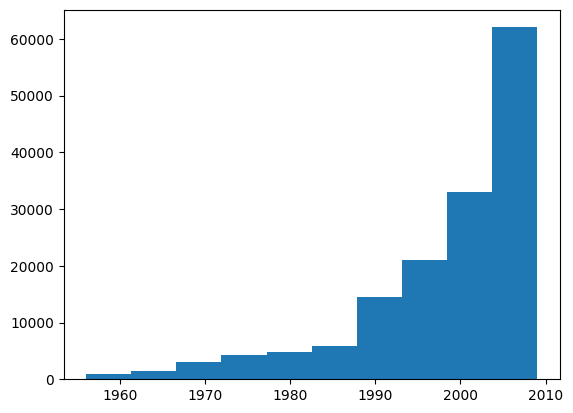

In [26]:
histogram("Year") #Essendo un problema di regressione non direi che il seguente dataset risulta sbilanciato

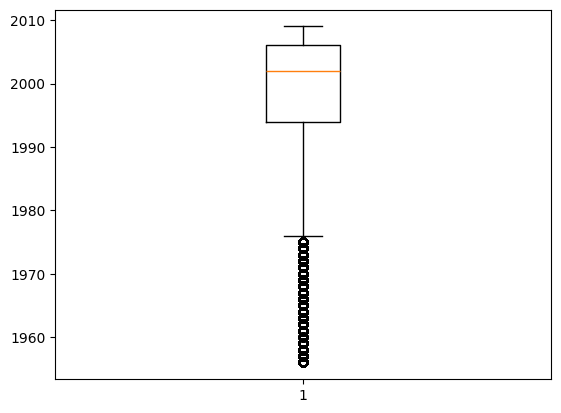

In [27]:
boxplot()

# Pre-processing

In [29]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [31]:
# Verifico presenza di valori null in X_train, y_train
print(X_train.isna().sum())
print(y_train.isna().sum())

# Faccio funzione per sostituire eventuali valori null che otterrò con i nuovi dati in base alla distrib. di essi


S0     0
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
S13    0
S14    0
S15    0
S16    0
S17    0
S18    0
S19    0
S20    0
S21    0
S22    0
S23    0
S24    0
S25    0
S26    0
S27    0
S28    0
S29    0
S30    0
S31    0
S32    0
S33    0
S34    0
S35    0
S36    0
S37    0
S38    0
S39    0
S40    0
S41    0
S42    0
S43    0
S44    0
S45    0
S46    0
S47    0
S48    0
S49    0
S50    0
S51    0
S52    0
S53    0
S54    0
S55    0
S56    0
S57    0
S58    0
S59    0
S60    0
S61    0
S62    0
S63    0
S64    0
S65    0
S66    0
S67    0
S68    0
S69    0
S70    0
S71    0
S72    0
S73    0
S74    0
S75    0
S76    0
S77    0
S78    0
S79    0
S80    0
S81    0
S82    0
S83    0
S84    0
S85    0
S86    0
S87    0
S88    0
S89    0
dtype: int64
Year    0
dtype: int64
